1.Simple Linear Regression_different dataset from the LAB

In [98]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
np.set_printoptions(precision=2)

In [99]:
def load_data_simple():
    data = np.loadtxt(r'C:/Users/pedro\source/repos/PedroCorreia07/Machine Learing Specialization_Coursera/Course 1\data_linear regression/houses.txt', delimiter=',')
    X = data[:,0]
    y = data[:,4]
    return X, y

In [100]:
x_single_train, y_single_train=load_data_simple()

In [101]:
x_single_train=x_single_train.reshape(-1,1) #the original 1D array with m elements has been reshaped into a 2D array with m rows and 1 column
y_single_train=y_single_train.reshape(-1,1)

Text(0.5, 0, 'Size in sqft')

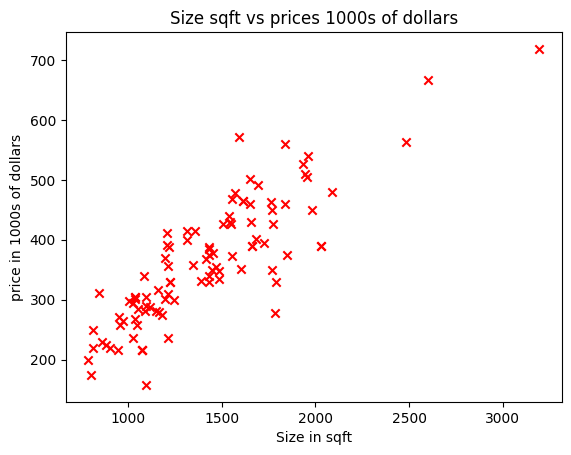

In [102]:
plt.scatter(x_single_train,y_single_train,marker="x",color="red")
plt.title("Size sqft vs prices 1000s of dollars")
plt.ylabel("price in 1000s of dollars")
plt.xlabel("Size in sqft")

In [103]:
simple_regr=LinearRegression()
simple_regr.fit(x_single_train,y_single_train)

LinearRegression()

In [104]:
w_simple=simple_regr.coef_[0][0]
b_simple=simple_regr.intercept_[0]
print(f"w={w_simple:}, b={b_simple:0.2f}")


w=0.21631411338389775, b=56.43


Text(0.5, 0, 'Size in sqft')

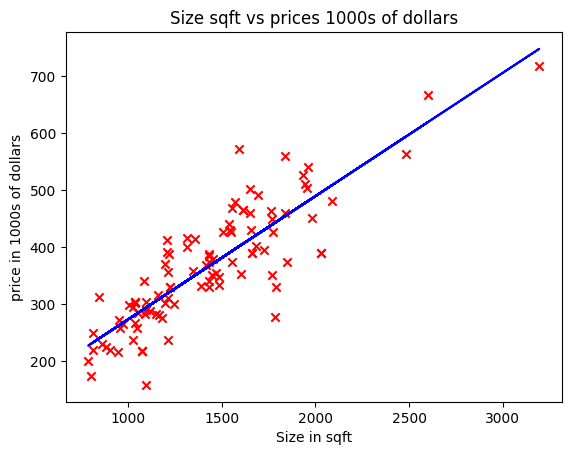

In [105]:
plt.scatter(x_single_train,y_single_train,marker="x",color="red")
plt.plot(x_single_train,w_simple*x_single_train+b_simple,'b')

plt.title("Size sqft vs prices 1000s of dollars")
plt.ylabel("price in 1000s of dollars")
plt.xlabel("Size in sqft")


In [106]:
m=x_single_train.shape[0]
predicted_simple=np.zeros(m) #initializes an array of size m with zeros. This array will be used to store the predicted values of the linear regression model.

for i in range(m):
    predicted_simple[i]=w_simple*x_single_train[i]+b_simple



In [107]:
from sklearn.metrics import r2_score

print("Mean absolute error: %.2f"%np.mean(np.absolute(predicted_simple-y_single_train)))
print("Residual sum of squares (MSE):%.2f"%np.mean((predicted_simple-y_single_train)**2))

print("R2-score:%.2f"%r2_score(predicted_simple,y_train))

Mean absolute error: 106.85
Residual sum of squares (MSE):18780.01
R2-score:0.64


In [108]:
def load_data_multi():
    data = np.loadtxt(r'C:/Users/pedro\source/repos/PedroCorreia07/Machine Learing Specialization_Coursera/Course 1\data_linear regression/houses.txt', delimiter=',')
    X = data[:,:4]
    y = data[:,4]
    return X, y

In [109]:
x_multi_train,y_multi_train=load_data_multi()

In [110]:
multi_regr=LinearRegression()
multi_regr.fit(x_multi_train, y_multi_train)

LinearRegression()

In [111]:
w_multi=multi_regr.coef_
b_multi=multi_regr.intercept_
print(f"w={w_multi:}, b={b_multi:0.2f}")

w=[  0.27 -32.9  -67.29  -1.47], b=221.50
